## Create Nodes (Materials, Formulations, Components, Battery Cells, Tests, and Defects)



```
// Materials (Anode & Cathode)
CREATE (:Material {id: "M1", name: "Graphite", type: "Anode"});
CREATE (:Material {id: "M2", name: "Silicon", type: "Anode"});
CREATE (:Material {id: "M3", name: "Silicon/Graphite", type: "Anode"});
CREATE (:Material {id: "M4", name: "NMC", type: "Cathode"});
CREATE (:Material {id: "M5", name: "LFP", type: "Cathode"});
CREATE (:Material {id: "M6", name: "LMFP", type: "Cathode"});

// Formulations
CREATE (:Formulation {id: "F1", name: "High-energy", description: "Optimized for energy density"});
CREATE (:Formulation {id: "F2", name: "Fast-charging", description: "Optimized for fast charging"});

// Formulation Instances
CREATE (:FormulationInstance {id: "FI1", name: "Formulation_1"});
CREATE (:FormulationInstance {id: "FI2", name: "Formulation_2"});
CREATE (:FormulationInstance {id: "FI3", name: "Formulation_3"});
CREATE (:FormulationInstance {id: "FI4", name: "Formulation_4"});
CREATE (:FormulationInstance {id: "FI5", name: "Formulation_5"});
CREATE (:FormulationInstance {id: "FI6", name: "Formulation_6"});

// Battery Components
CREATE (:BatteryComponent {id: "C1", name: "Anode"});
CREATE (:BatteryComponent {id: "C2", name: "Cathode"});

// Anode & Cathode Instances
CREATE (:AnodeInstance {id: "A1", name: "Anode_Instance_1"});
CREATE (:AnodeInstance {id: "A2", name: "Anode_Instance_2"});
CREATE (:AnodeInstance {id: "A3", name: "Anode_Instance_3"});
CREATE (:CathodeInstance {id: "CA1", name: "Cathode_Instance_1"});
CREATE (:CathodeInstance {id: "CA2", name: "Cathode_Instance_2"});
CREATE (:CathodeInstance {id: "CA3", name: "Cathode_Instance_3"});

// Battery Cell Type
CREATE (:BatteryCell {id: "BC_LiIon", type: "Li-ion", capacity: "3000mAh"});
CREATE (:BatteryCell {id: "BC_NaIon", type: "Na-ion", capacity: "5000mAh"});

// Battery Cell Instances (Storing Test Results as Properties)
CREATE (:BatteryCellInstance {id: "BCI1", name: "BatteryCell_Instance_1", cycle_life_test: "Passed", thermal_stability_test: "Failed"});
CREATE (:BatteryCellInstance {id: "BCI2", name: "BatteryCell_Instance_2", cycle_life_test: "Passed", thermal_stability_test: "Passed"});
CREATE (:BatteryCellInstance {id: "BCI3", name: "BatteryCell_Instance_3", cycle_life_test: "Failed", thermal_stability_test: "Failed"});

// Test Types
CREATE (:TestType {id: "TT1", test_type: "Cycle Life"});
CREATE (:TestType {id: "TT2", test_type: "Thermal Stability"});

// Defects
CREATE (:Defect {id: "D1", defect_type: "Overheating", severity: "High"});


```



## Define Relationships



```
// Material to Formulation Relationships
MATCH (m1:Material {name: "Graphite"}), (f1:Formulation {name: "High-energy Li-ion"})
CREATE (m1)-[:USED_IN]->(f1);

MATCH (m2:Material {name: "Silicon"}), (f2:Formulation {name: "Fast-charging Li-ion"})
CREATE (m2)-[:USED_IN]->(f2);

// Assign Formulation Instances to Formulations
MATCH (fi1:FormulationInstance {name: "Formulation_1"}), (f1:Formulation {name: "High-energy Li-ion"})
CREATE (fi1)-[:INSTANCE_OF]->(f1);

MATCH (fi4:FormulationInstance {name: "Formulation_4"}), (f2:Formulation {name: "Fast-charging Li-ion"})
CREATE (fi4)-[:INSTANCE_OF]->(f2);

// Battery Component Instances
MATCH (a:BatteryComponent {name: "Anode"}), (ai1:AnodeInstance {name: "Anode_Instance_1"})
CREATE (ai1)-[:INSTANCE_OF]->(a);

MATCH (c:BatteryComponent {name: "Cathode"}), (ci1:CathodeInstance {name: "Cathode_Instance_1"})
CREATE (ci1)-[:INSTANCE_OF]->(c);

// Battery Cell Instances Belonging to Types
MATCH (bc:BatteryCell {id: "BC_LiIon"}), (bci1:BatteryCellInstance {id: "BCI1"})
CREATE (bci1)-[:INSTANCE_OF]->(bc);

MATCH (bc:BatteryCell {id: "BC_NaIon"}), (bci3:BatteryCellInstance {id: "BCI3"})
CREATE (bci3)-[:INSTANCE_OF]->(bc);

// Battery Cell Instances Containing Anode & Cathode
MATCH (bci1:BatteryCellInstance {name: "BatteryCell_Instance_1"}), (ai1:AnodeInstance {name: "Anode_Instance_1"}), (ci1:CathodeInstance {name: "Cathode_Instance_1"})
CREATE (bci1)-[:CONTAINS]->(ai1),
       (bci1)-[:CONTAINS]->(ci1);

MATCH (bci2:BatteryCellInstance {name: "BatteryCell_Instance_2"}), (ai2:AnodeInstance {name: "Anode_Instance_2"}), (ci2:CathodeInstance {name: "Cathode_Instance_2"})
CREATE (bci2)-[:CONTAINS]->(ai2),
       (bci2)-[:CONTAINS]->(ci2);

// Each Battery Cell Instance Undergoes Both Test Types
MATCH (bci:BatteryCellInstance), (tt:TestType)
CREATE (bci)-[:UNDERGOES]->(tt);

// Link Failed Tests to Defects
MATCH (bci:BatteryCellInstance), (d1:Defect {id: "D1"})
WHERE bci.thermal_stability_test = "Failed"
CREATE (bci)-[:HAS_DEFECT]->(d1);


```



## 3. Queries to Retrieve Information
Retrieve All Battery Cells and Their Test Results



```
MATCH (bci:BatteryCellInstance)
RETURN bci.name AS BatteryCell_Instance,
       bci.cycle_life_test AS Cycle_Life_Result,
       bci.thermal_stability_test AS Thermal_Stability_Result;

```
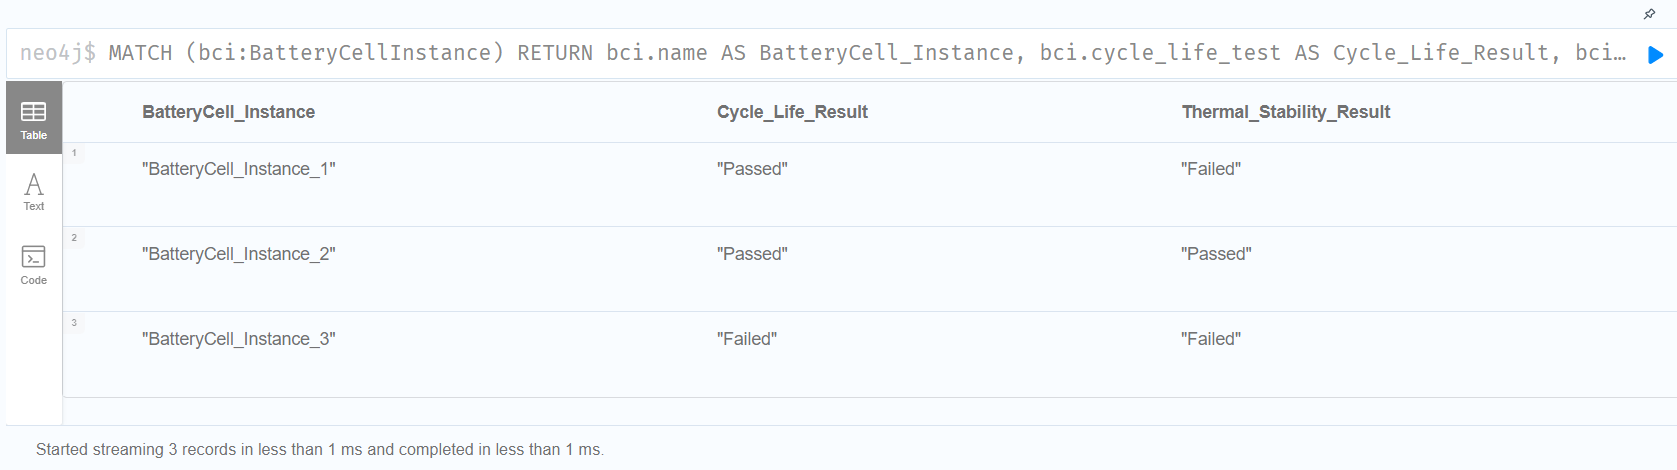


Find Battery Cells That Failed Any Tests



```
MATCH (bci:BatteryCellInstance)
WHERE bci.cycle_life_test = "Failed" OR bci.thermal_stability_test = "Failed"
RETURN bci.name AS BatteryCell_Instance,
       bci.cycle_life_test AS Cycle_Life_Result,
       bci.thermal_stability_test AS Thermal_Stability_Result;

```
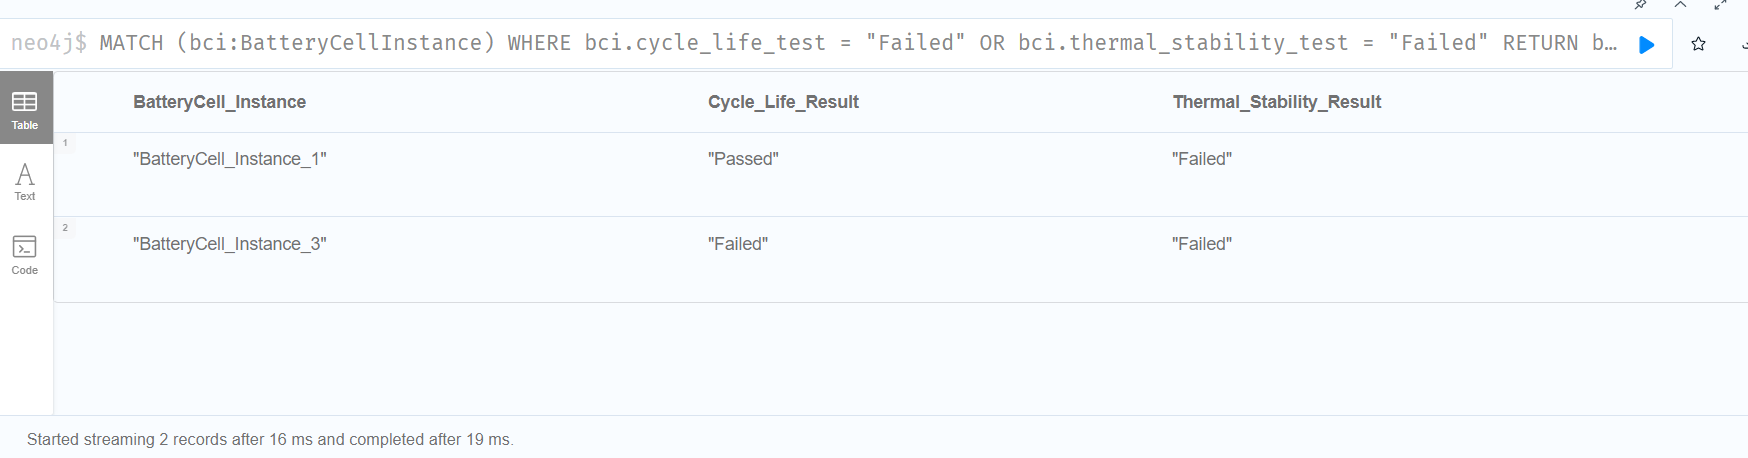


Find Battery Cells That Had a Defect


```
MATCH (bci:BatteryCellInstance)-[:HAS_DEFECT]->(d:Defect)
RETURN bci.name AS BatteryCell_Instance, d.defect_type AS Defect, d.severity AS Severity;

```
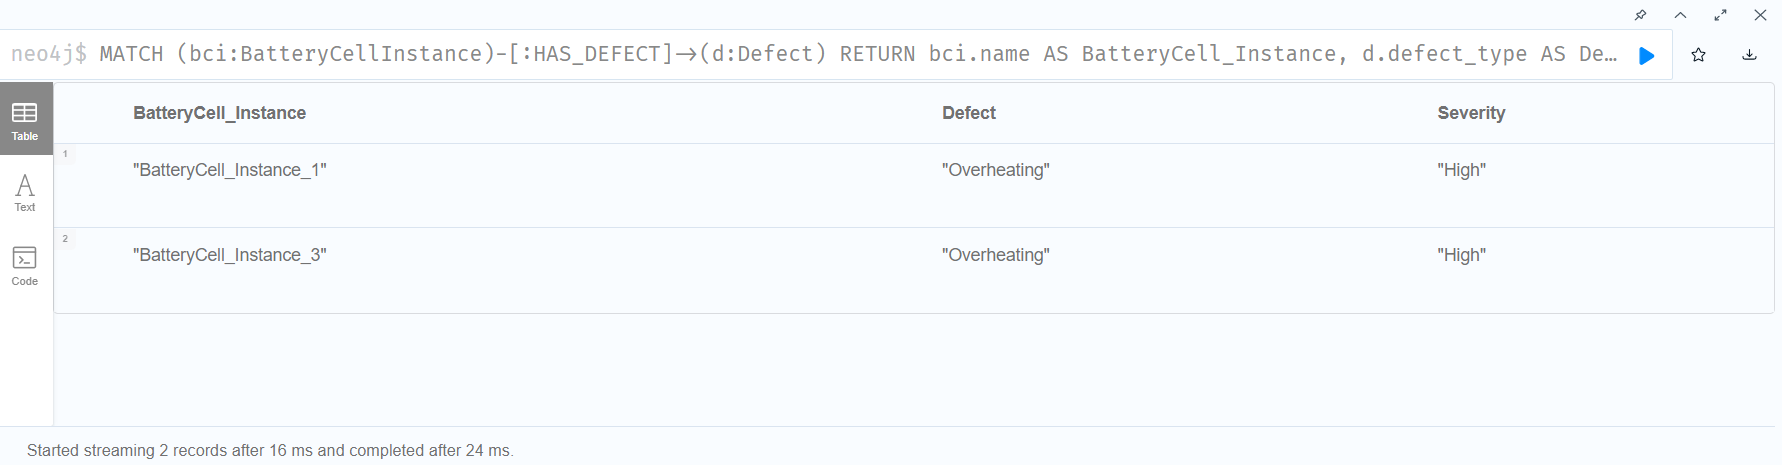


Find Battery Cells That Use a Specific Anode or Cathode

```
MATCH (bci:BatteryCellInstance)-[:CONTAINS]->(a:AnodeInstance)
RETURN bci.name AS BatteryCell_Instance, a.name AS Anode;

```

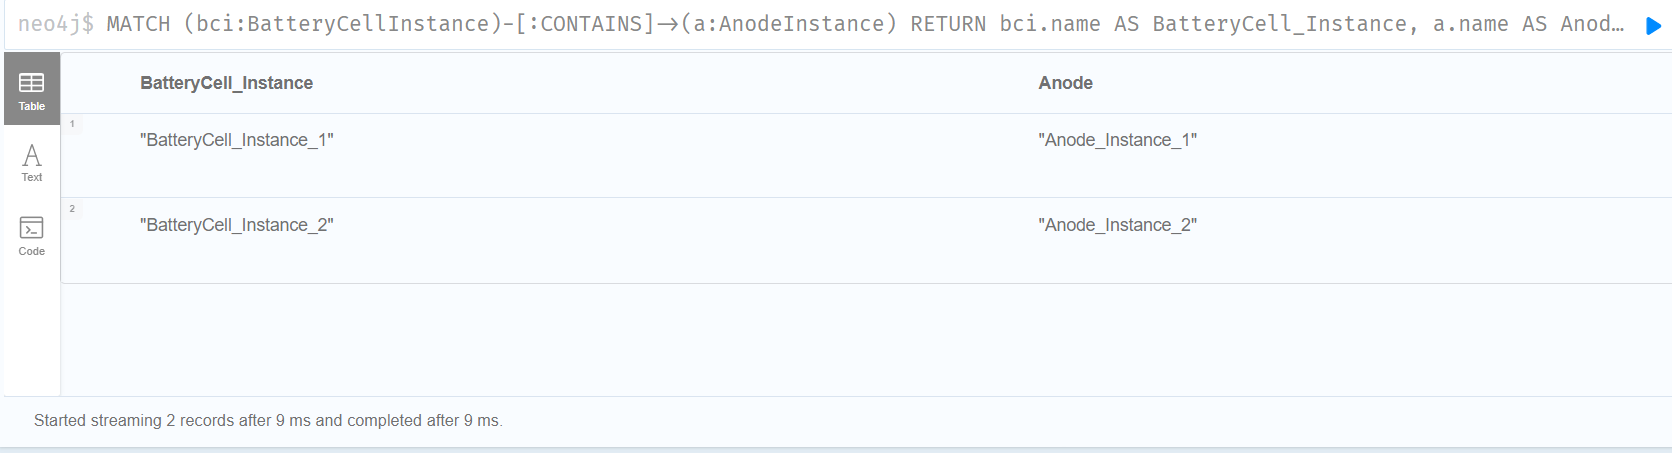



Find the Type of Battery Each Battery Cell Instance Belongs To


```
MATCH (bci:BatteryCellInstance)-[:INSTANCE_OF]->(bc:BatteryCell)
RETURN bci.name AS BatteryCell_Instance, bc.type AS BatteryCell_Type;

```
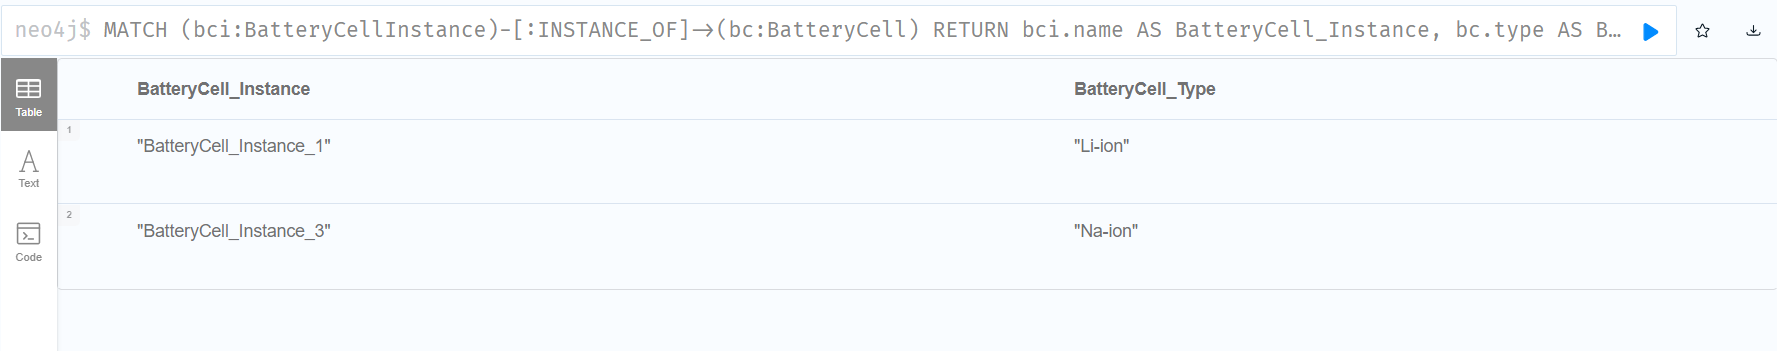


Visualize the graph




```
MATCH (n1)-[r]->(n2) RETURN r, n1, n2 LIMIT 25

```
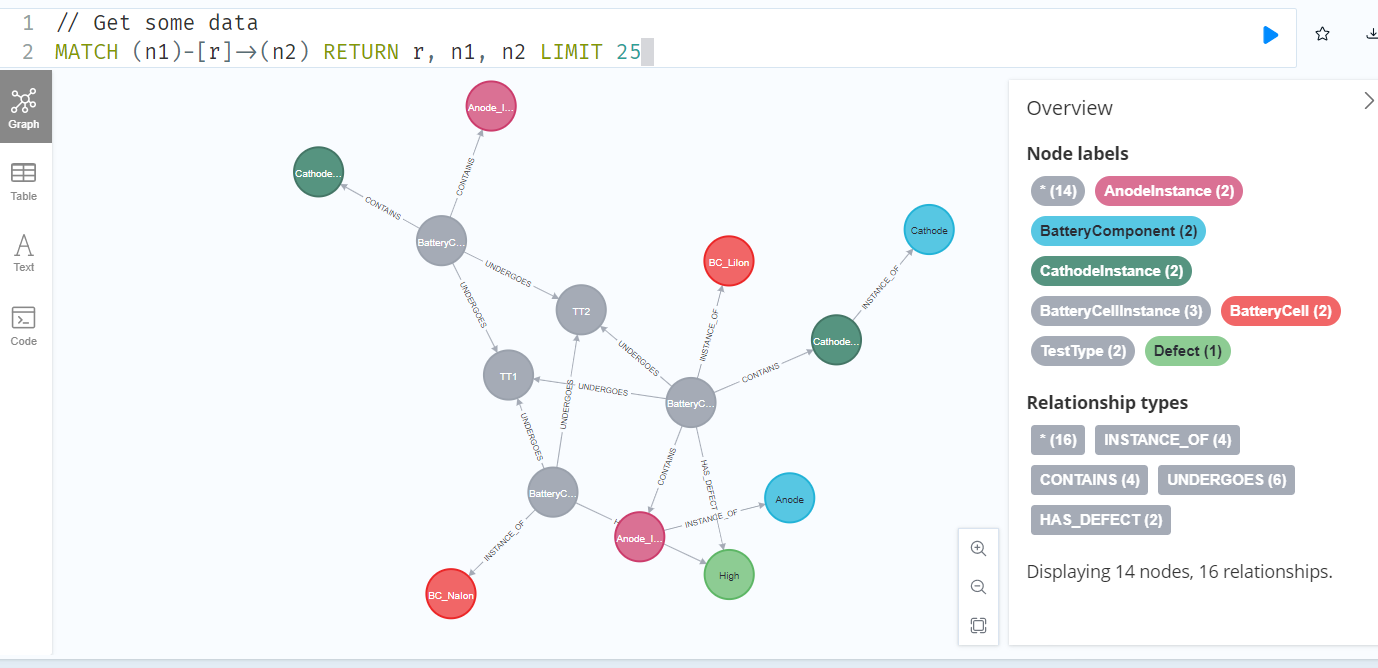


In [ ]:
pip install neo4j rdflib owlready2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.9/564.9 kB 32.1 MB/s eta 0:00:00
  Created wheel for owlready2: filename=owlready2-0.47-cp311-cp311-linux_x86_64.whl size=24577466 sha256=3bbc9cf09bbc06c8b15bbf20a9cd90ba25b54ea10facee62be7a027c0d36a590
  Stored in directory: /root/.cache/pip/wheels/25/9a/a3/fb1ac6339caa859c8bb18d685736168b0b51d851af13d81d52
Successfully built owlready2


In [ ]:
from neo4j import GraphDatabase

# Define Neo4j connection
URI = "bolt://localhost:7687"  # Change if using remote database
AUTH = ("neo4j", "your-password")  # Update with your actual password

# Function to check connection
def test_neo4j_connection():
    try:
        with GraphDatabase.driver(URI, auth=AUTH) as driver:
            with driver.session() as session:
                result = session.run("RETURN 'Neo4j is Running' AS message")
                print(result.single()["message"])
    except Exception as e:
        print(f"⚠️ Connection Error: {e}")

# Run the test
test_neo4j_connection()


⚠️ Connection Error: Couldn't connect to localhost:7687 (resolved to ()):
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [Errno 111] Connection refused)
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [Errno 99] Cannot assign requested address)


In [ ]:
from neo4j import GraphDatabase

# Neo4j connection setup
URI = "bolt://localhost:7687"  # Change if needed
AUTH = ("neo4j", "password")    # Replace with your credentials

# Define query to create a battery manufacturing graph
QUERY = """
MERGE (b:Battery {id: "B1", type: "Li-ion", capacity: 100})
MERGE (m:Material {name: "Lithium"})
MERGE (e:Equipment {id: "EQ-001", type: "Coating Machine"})
MERGE (p:Process {step: "Coating", temperature: 50})
MERGE (d:Defect {name: "Electrode Delamination", severity: "High"})
MERGE (b)-[:CONTAINS]->(m)
MERGE (b)-[:MANUFACTURED_USING]->(e)
MERGE (e)-[:PERFORMS]->(p)
MERGE (b)-[:SHOWS]->(d)
"""

# Function to execute query
def create_graph():
    with GraphDatabase.driver(URI, auth=AUTH) as driver:
        with driver.session() as session:
            session.run(QUERY)
    print("Graph data inserted into Neo4j!")

# Run the function
create_graph()


ServiceUnavailable: Couldn't connect to localhost:7687 (resolved to ()):
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [Errno 111] Connection refused)
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [Errno 99] Cannot assign requested address)